In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
%matplotlib inline


In [2]:
torch.cuda.current_device()

0

In [3]:
torch.cuda.device(0)

In [4]:
torch.cuda.device_count()

1

In [12]:
torch.cuda.get_device_name(torch.cuda.current_device())

'GeForce GTX 1080 Ti'

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()
#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
#    print('Memory Usage:')
#    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
#    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cuda

GeForce GTX 1080 Ti


In [7]:
import torch
print(torch.__version__)

1.0.0.dev20181207


In [19]:
model_ft = models.densenet161(pretrained=True)
model_ft.fc = nn.Linear( model_ft.classifier.out_features,5)

In [76]:
#model_ft

In [21]:
model_ft.classifier

Linear(in_features=2208, out_features=1000, bias=True)

In [75]:
#model_ft

In [ ]:
# To view which layers are freeze and which layers are not freezed:
for name, child in model_ft.named_children():
  for name_2, params in child.named_parameters():
    print(name_2, params.requires_grad)

In [28]:
model2 = models.squeezenet1_0()

/home/norvilr/anaconda3/envs/my_env/lib/python3.7/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/home/norvilr/anaconda3/envs/my_env/lib/python3.7/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


In [74]:
#model2

In [46]:
def imshow(image):
    """Display image"""
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    #plt.axis('off')
    plt.show()

In [49]:
data_dir = 'data/flower_data/'
PATH = data_dir

train_dir = 'train'
val_dir = 'valid'

In [58]:
data_transforms = {
    # Train uses data augmentation
    train_dir:
        transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.7, 0.7)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomRotation(degrees=30),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ]),
    # Validation does not use augmentation
    val_dir:
        transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [71]:

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in [train_dir, val_dir]}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16, shuffle=True, num_workers=8) for x in [train_dir, val_dir]}

dataset_sizes = {x: len(image_datasets[x]) for x in [train_dir, val_dir]}

class_names = image_datasets[train_dir].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [41]:
!ls data/flower_data/train/26

image_06487.jpg  image_06495.jpg  image_06508.jpg  image_06518.jpg
image_06488.jpg  image_06496.jpg  image_06509.jpg  image_06520.jpg
image_06489.jpg  image_06499.jpg  image_06510.jpg  image_06521.jpg
image_06490.jpg  image_06502.jpg  image_06511.jpg  image_06522.jpg
image_06491.jpg  image_06503.jpg  image_06512.jpg  image_06523.jpg
image_06492.jpg  image_06504.jpg  image_06513.jpg  image_06524.jpg
image_06493.jpg  image_06505.jpg  image_06515.jpg  image_06525.jpg
image_06494.jpg  image_06507.jpg  image_06517.jpg  image_06527.jpg


(500, 523, 3)


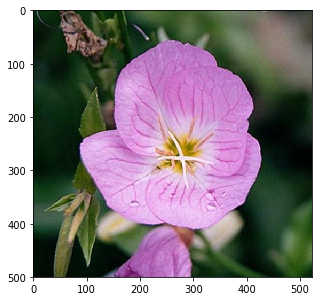

In [47]:
# Image manipulations
from PIL import Image

# Example image
x = Image.open('data/flower_data/train/1/' + 'image_06734.jpg')
print(np.array(x).shape)
imshow(x)

(500, 667, 3)


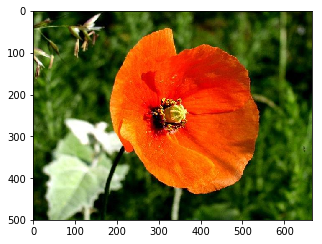

In [48]:
x = Image.open('data/flower_data/train/26/' + 'image_06513.jpg')
print(np.array(x).shape)
imshow(x)

In [72]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


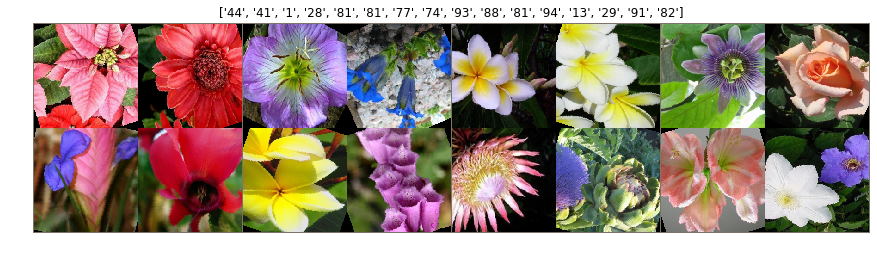

In [73]:

# Get a batch of training data
# inputs contains 4 images because batch_size=4 for the dataloaders
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

plt.figure(figsize=(15, 15))
plt.axis('off')
imshow(out, title=[class_names[x] for x in classes])

In [84]:
import PIL
import numpy as np
import torch
import torchvision

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

def show_dataset(dataset, n=6):
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))for i in range(len(dataset))))
  plt.imshow(img)
  plt.axis('off')

In [86]:
dataset = torchvision.datasets.ImageFolder('data/flower_data/', transform=transforms)
show_dataset(image_datasets)


KeyError: 0